In [2]:
import random
import torch
from d2l import torch as d2l


In [4]:
help(torch.normal)

Help on built-in function normal:

normal(...)
    normal(mean, std, *, generator=None, out=None) -> Tensor
    
    Returns a tensor of random numbers drawn from separate normal distributions
    whose mean and standard deviation are given.
    
    The :attr:`mean` is a tensor with the mean of
    each output element's normal distribution
    
    The :attr:`std` is a tensor with the standard deviation of
    each output element's normal distribution
    
    The shapes of :attr:`mean` and :attr:`std` don't need to match, but the
    total number of elements in each tensor need to be the same.
    
    .. note:: When the shapes do not match, the shape of :attr:`mean`
              is used as the shape for the returned output tensor
    
    .. note:: When :attr:`std` is a CUDA tensor, this function synchronizes
              its device with the CPU.
    
    Args:
        mean (Tensor): the tensor of per-element means
        std (Tensor): the tensor of per-element standard deviation

In [8]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    print(X)
    y = torch.matmul(X, w)+b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)


tensor([[-0.8303,  0.7725],
        [ 1.5681,  0.2889],
        [-0.5538,  0.9078],
        ...,
        [ 0.6080, -0.7353],
        [ 0.5131,  1.4673],
        [ 0.8999, -0.6389]])


In [9]:
print('features:',features[0],'\nlabel:',labels[0])


features: tensor([-0.8303,  0.7725]) 
label: tensor([-0.0818])


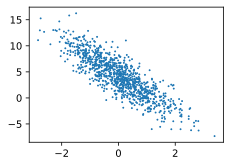

In [16]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1)

In [17]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


tensor([[ 1.2689,  0.0158],
        [-1.7664,  0.4002],
        [ 0.5735,  0.3602],
        [ 0.8999, -0.6389],
        [-1.6422,  1.0380],
        [-0.5518, -0.3375],
        [ 0.3059,  0.0739],
        [ 1.6047, -0.0619],
        [ 0.4191, -1.2123],
        [ 0.0099, -1.4424]]) 
 tensor([[ 6.7064],
        [-0.7068],
        [ 4.1067],
        [ 8.1816],
        [-2.6336],
        [ 4.2312],
        [ 4.5541],
        [ 7.6254],
        [ 9.1575],
        [ 9.1312]])


In [25]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [19]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [20]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()


In [26]:
lr=0.5
num_epochs=10
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')


epoch1,loss0.000056
epoch2,loss0.000052
epoch3,loss0.000063
epoch4,loss0.000059
epoch5,loss0.000052
epoch6,loss0.000056
epoch7,loss0.000051
epoch8,loss0.000060
epoch9,loss0.000053
epoch10,loss0.000067


In [22]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0004, -0.0011], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)


In [29]:
from torch.utils import data
true_w = torch.tensor([2, -3.4])
true_b = 4.2
n_features,n_labels=d2l.synthetic_data(true_w,true_b,1000)


In [30]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)


batch_size = 10
data_iter=load_array((n_features,n_labels),batch_size)


In [31]:
next(iter(data_iter))

[tensor([[ 0.4857, -0.9905],
         [ 0.5617,  0.9734],
         [-0.1256, -1.4230],
         [-0.0514,  1.1140],
         [ 1.1074, -0.4128],
         [-0.6682,  1.8131],
         [-0.5490, -0.0806],
         [-2.6437, -0.6787],
         [ 1.1380,  0.2109],
         [ 0.1517, -1.7266]]),
 tensor([[ 8.5431],
         [ 2.0120],
         [ 8.7950],
         [ 0.3071],
         [ 7.8291],
         [-3.3172],
         [ 3.3832],
         [ 1.2283],
         [ 5.7548],
         [10.3861]])]

In [32]:
from torch import nn
n_net=nn.Sequential(nn.Linear(2,1)) # 第一个指定输入特征形状，即2,权重有两个，第二个指定输出特征形状，输出特征形状为单个标量，因此为1。



In [33]:
n_net[0].weight.data.normal_(0,0.01)
n_net[0].bias.data.fill_(0)


tensor([0.])

In [34]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(n_net.parameters(), lr=0.03)
n_num_epochs = 3
for epoch in range(n_num_epochs):
    for X, y in data_iter:
        l = loss(n_net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(n_net(features),labels)
    print(f'epoch{epoch+1},loss{l:f}')


epoch1,loss0.000236
epoch2,loss0.000101
epoch3,loss0.000105


In [35]:
w = n_net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = n_net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([0.0003, 0.0015])
b的估计误差： tensor([-0.0005])
